In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [50]:
data_notarget = pickle.load(open('results/1608356347.337566_notarget.pickle', 'rb'))
data_target = pickle.load(open('results/1608345412.4393542_exp_target.pickle', 'rb'))
data_new = pickle.load(open('results/1610998877.3988814_one_agent.pickle', 'rb'))

print(data_new['config'])

{'envName': 'CartPole-v1', 'useTargetQ': True, 'QTargetLag': 100, 'adpBins': 9, 'exploration': {'initialEpsilon': 1.0, 'finalEpsilon': 0.01, 'decaySteps': 5000}, 'mutual': {'ADPQ': False, 'heterogeneous': True, 'mutualSteps': 500, 'weight': 5.0, 'type': 'proportional'}, 'standard': {'Q': True, 'ADP': True}, 'trials': 1, 'stepsPerTrial': 1500, 'stepsPerEvaluation': 100, 'gamma': 0.99, 'holdOutStates': 25}


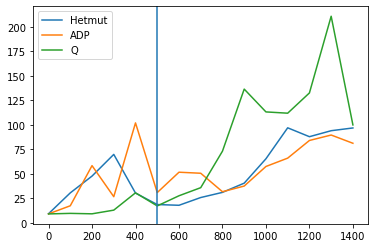

In [51]:
xticks = np.arange(data_new['config']['stepsPerTrial'] / data_new['config']['stepsPerEvaluation']) * data_new['config']['stepsPerEvaluation']
plt.plot(xticks, np.mean(data_new['results'], axis=0)[:, 2], label='Hetmut')
plt.plot(xticks, np.mean(data_new['results'], axis=0)[:, 1], label='ADP')
plt.plot(xticks, np.mean(data_new['results'], axis=0)[:, 0], label='Q')
plt.legend()
plt.axvline(data_new['config']['mutual']['mutualSteps'])
plt.show()

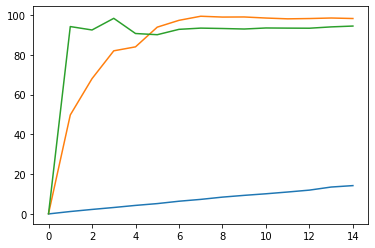

In [45]:
data_one = pickle.load(open('results/1610998877.3988814_one_agent.pickle', 'rb'))
plt.plot(np.mean(data_one['val_history'].T, axis=1))

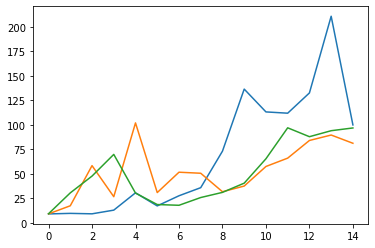

In [46]:
plt.plot(np.mean(data_one['results'], axis=0))